# **Laboratorio #4 - Modulación de Pulsos**

Carlos Jara - Chrispher Morales - Emanuel Pacheco

In [2]:
#Importar las librerías por utilizar
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from numpy import sin,cos,pi, linspace
from scipy import signal
from scipy.fft import fft, fftfreq
from skimage import io
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from scipy.signal import butter, lfilter, filtfilt

#Obtener la direccion de la imagen
path = os.getcwd()

#Definicion de funciones a utilizar
#Funcion para crear una señal cosenoidal
def cosenoidal(f,A,Offset=0, Theta=0):
    m = A*cos(2*pi*f*t + Theta) + Offset
    return m

## ACTIVIDAD # 1 

### 1. Construya un sistema de modulación por muestreo de pulsos (PAM), el cual debe tener las siguientes características:


#### a. El usuario debe escoger el tipo de señal a muestrear, puede ser entre tres opciones: una señal senoidal, una cuadrada y una triangular. Estas señales ya deben tener una frecuencia pre-establecida cuyo valor debe ser elegido de acuerdo al requerimiento b).

#### b. El usuario debe escoger adicionalmente la frecuencia de muestreo, se deben recomendar 3 opciones que permitan visualizar el efecto de un muestreo apropiado, un sobre-muestreo y un sub-muestreo.

#### c. Para el pulso, se debe poder seleccionar el ancho del pulso, de igual forma, para tres casos: un pulso angosto, uno de mediana angostura y otro ancho. Los valores deben ser tales que, para el caso de una tasa de muestreo apropiada, permitan visualizar los efectos del ancho del pulso en la señal resultante muestreada.

#### d. Como resultado se debe de mostrar la señal en frecuencia resultante del muestreo, de manera que se puedan visualizar los efectos de un muestreo apropiado, un sobre-muestreo y un sub-muestreo. Con los posibles anchos de pulsos.

#### e. Una vez obtenido el espectro de la señal muestreada, aplique solamente un filtropara recuperar la señal original, y reconstrúyala.


Elabore un análisis de los resultados obtenidos para las diferentes combinaciones.

In [7]:
#Funcion para realizar un FFT de una señal (Usado en la tarea 3)
def plotfft(func):
    samples = 1000
    T = 1/20
    F = fft(func)
    tf = fftfreq(samples, T/samples)
    return tf,F

#Funciones para filtro basa bajas
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

#Funcion de modulacion de muestreo por amplitud de pulso
def PAM():
    #Se define el espacio de tiempo
    samples = 1000
    T = 1/20
    t = linspace(0, T, samples, endpoint=False)
    fs = (T/samples)**-1

    #Etapa de creacion de senales
    t_sign= {1:"Senoidal",2:"Cuadrada",3:"Triangular"}
    print("Tipos de senales:\n1-Senoidal\n2-Cuadrada \n3-Triangular")
    tip = int(input("Seleccione el tipo de senal deseada"))
    frec = 60
    if tip == 1:
        m = sin(t*2*pi*frec)
        cutoff = 300
        Bw = 4*frec
    elif tip == 2:
        cutoff = 1000
        m = signal.square(t*2*pi*frec)
        m = butter_lowpass_filter(m, cutoff, fs, 2)
        Bw = cutoff
    elif tip ==3:
        cutoff = 1000
        m = signal.sawtooth(t*2*pi*frec, 0.5)
        m = butter_lowpass_filter(m, cutoff, fs, 2)
        Bw = cutoff  
    fig0, axs = plt.subplots(4,2,figsize=(26,20))
    fig0.suptitle('Modulacion por amplitud de pulso')

    #Moduladora
    axs[0,0].plot(t,m,color='red')
    axs[0,0].set_title('Señal de entrada')
    axs[0,0].set(xlim=(0,0.03),ylim=(-1.25,1.25))
    axs[0,0].grid()
    #Moduladora en frecuencia
    Mtf, M = plotfft(m)
    axs[0,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
    axs[0,1].vlines(Mtf,0,np.abs(M),color='red')
    axs[0,1].set_title('Moduladora en frecuencia')
    axs[0,1].grid()


    #Seleccion del tiempo de muestreo
    t_muest = {1:"Submuestreo",2:"Muestreo apropiado",3:"Sobremuestreo"}
    print("Tiempos de muestreo:\n1-Submuestreo\n2-Muestreo apropiado \n3-Sobremuestreo")
    mus = int(input("Seleccione el tipo de muestreo"))
    if mus == 1:
        tsamp = Bw*0.5
    elif mus == 2:
        tsamp = 2*Bw
    elif mus ==3:
        tsamp = Bw*10


    #Seleccion de ancho de pulso
    p_width = {1:"Angosto",2:"Normal",3:"Ancho"}
    print("Ancho de pulso:\n1-Angosto\n2-Normal \n3-Ancho")
    an = int(input("Seleccione el ancho de pulso"))
    if an == 1:
        wid = 0.1
    elif an == 2:
        wid = 0.5
    elif an ==3:
        wid = 0.75

    print(f"\nLa onda modulada es {t_sign[tip]}, con {t_muest[mus]} y de pulso {p_width[an]}")

    #Creacion del tren de pulsos
    c = (signal.square(2*pi*t*tsamp, wid)+1)/2

    #Grafica portadora
    axs[1,0].plot(t,c,color='blue')
    axs[1,0].set_title('Tren de pulsos')
    axs[1,0].set(xlim=(0,0.03),ylim=(-0.25,1.25))
    axs[1,0].grid()
    #portadora en frecuencia
    Ctf, C = plotfft(c)
    axs[1,1].set(xlim=(-100,100),ylim=(-20,100),xticks=(range(-540,580,60)))
    axs[1,1].vlines(Ctf,0,C,color='red')
    axs[1,1].set_title('Portadora en frecuencia')
    axs[1,1].grid()

    #Senal muestreada
    s = c*m
    axs[2,0].plot(t,s,color='green')
    axs[2,0].set_title('Senal modulada')
    axs[2,0].set(xlim=(0,0.03),ylim=(-1.25,1.25))
    axs[2,0].grid()
    Stf, S = plotfft(s)
    axs[2,1].set(xlim=(-100,100),ylim=(-20,100),xticks=(range(-1000,1000,100)))
    axs[2,1].vlines(Stf,0,np.abs(S),color='red')
    axs[2,1].set_title('Modulada en frecuencia')
    axs[2,1].grid()

    #Señal recuperada
    order = 10
    fs = (T/samples)**-1
    norm_frec = (2*cutoff)/fs
    b,a = butter(order, norm_frec, analog=False)
    md = filtfilt(b,a,s)
    #md = butter_lowpass_filter(s, 250, fs, order)
    MDtf,MD = plotfft(md)

    axs[3,0].plot(t,md,color='red')
    axs[3,0].set_title('Señal recuperada')
    axs[3,0].set(xlim=(0,0.03),ylim=(-1.25,1.25))
    axs[3,0].grid()

    axs[3,1].set(xlim=(-100,100),ylim=(-20,500),xticks=(range(-540,580,60)))
    axs[3,1].vlines(MDtf,0,np.abs(MD),color='red')
    axs[3,1].set_title('Recuperada en frecuencia')
    axs[3,1].grid()

Se crea una funcion que permite modular por muestreo de ancho de pulso una señal para muestrear, pérmite seleccionar el tipo de señal por muestrear, la frecuencia de muestreo y el ancho de pulso. La frecuencia de muestreo se define en base a la frecuencia de la señal por muestrear (fm) de forma que sea la mitad de fm, el doble de fm o 10 veces fm, produciendo submuestreo, muestreo apropiado segun Nyquist, o sobre muestreo respectivamente. Asimismo, se puede controlar el ancho de pulso para que sea de 0.1, 0.5 o 0.75, produciendo un ancho de pulso angosto, normal o ancho respectivamente.

Tipos de senales:
1-Senoidal
2-Cuadrada 
3-Triangular
Tiempos de muestreo:
1-Submuestreo
2-Muestreo apropiado 
3-Sobremuestreo
Ancho de pulso:
1-Angosto
2-Normal 
3-Ancho

La onda modulada es Senoidal, con Muestreo apropiado y de pulso Normal


C:\Users\carlo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\carlo\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


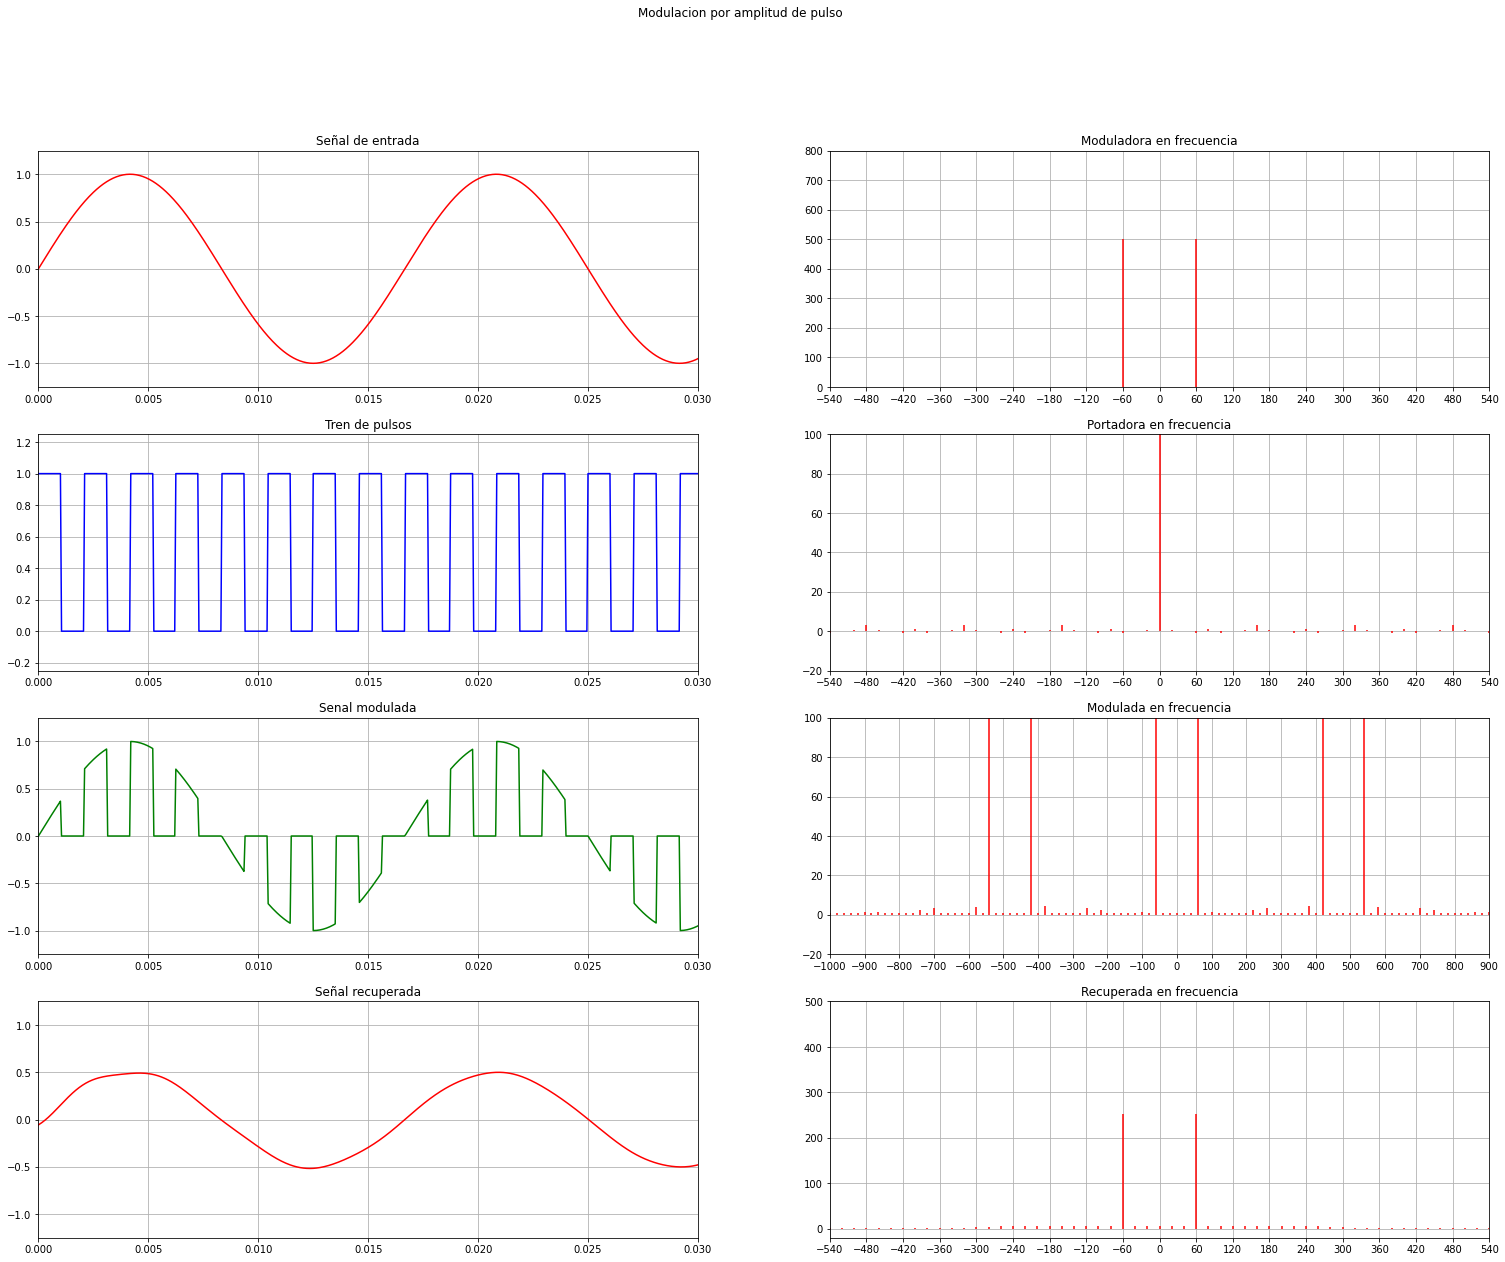

In [8]:
#Senoidal, apropiado y normal
PAM()

La primera prueba que se realiza es con una señal senoidal que se modula por muestreo de ancho de pulsos, para esto se selecciona un muestreo apropiado y un ancho de pulso normal. Se aprecia una correcta modulacion y recuperacion de la señal, esto debido a que se cumple con el teorema de Nyquist. Y se recupera la señal deseada. Asimismo se observa una atenuacion en la señal recuperada, esto debido a la naturaleza del filtro.

Tipos de senales:
1-Senoidal
2-Cuadrada 
3-Triangular
Tiempos de muestreo:
1-Submuestreo
2-Muestreo apropiado 
3-Sobremuestreo
Ancho de pulso:
1-Angosto
2-Normal 
3-Ancho

La onda modulada es Cuadrada, con Muestreo apropiado y de pulso Normal


C:\Users\carlo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\carlo\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


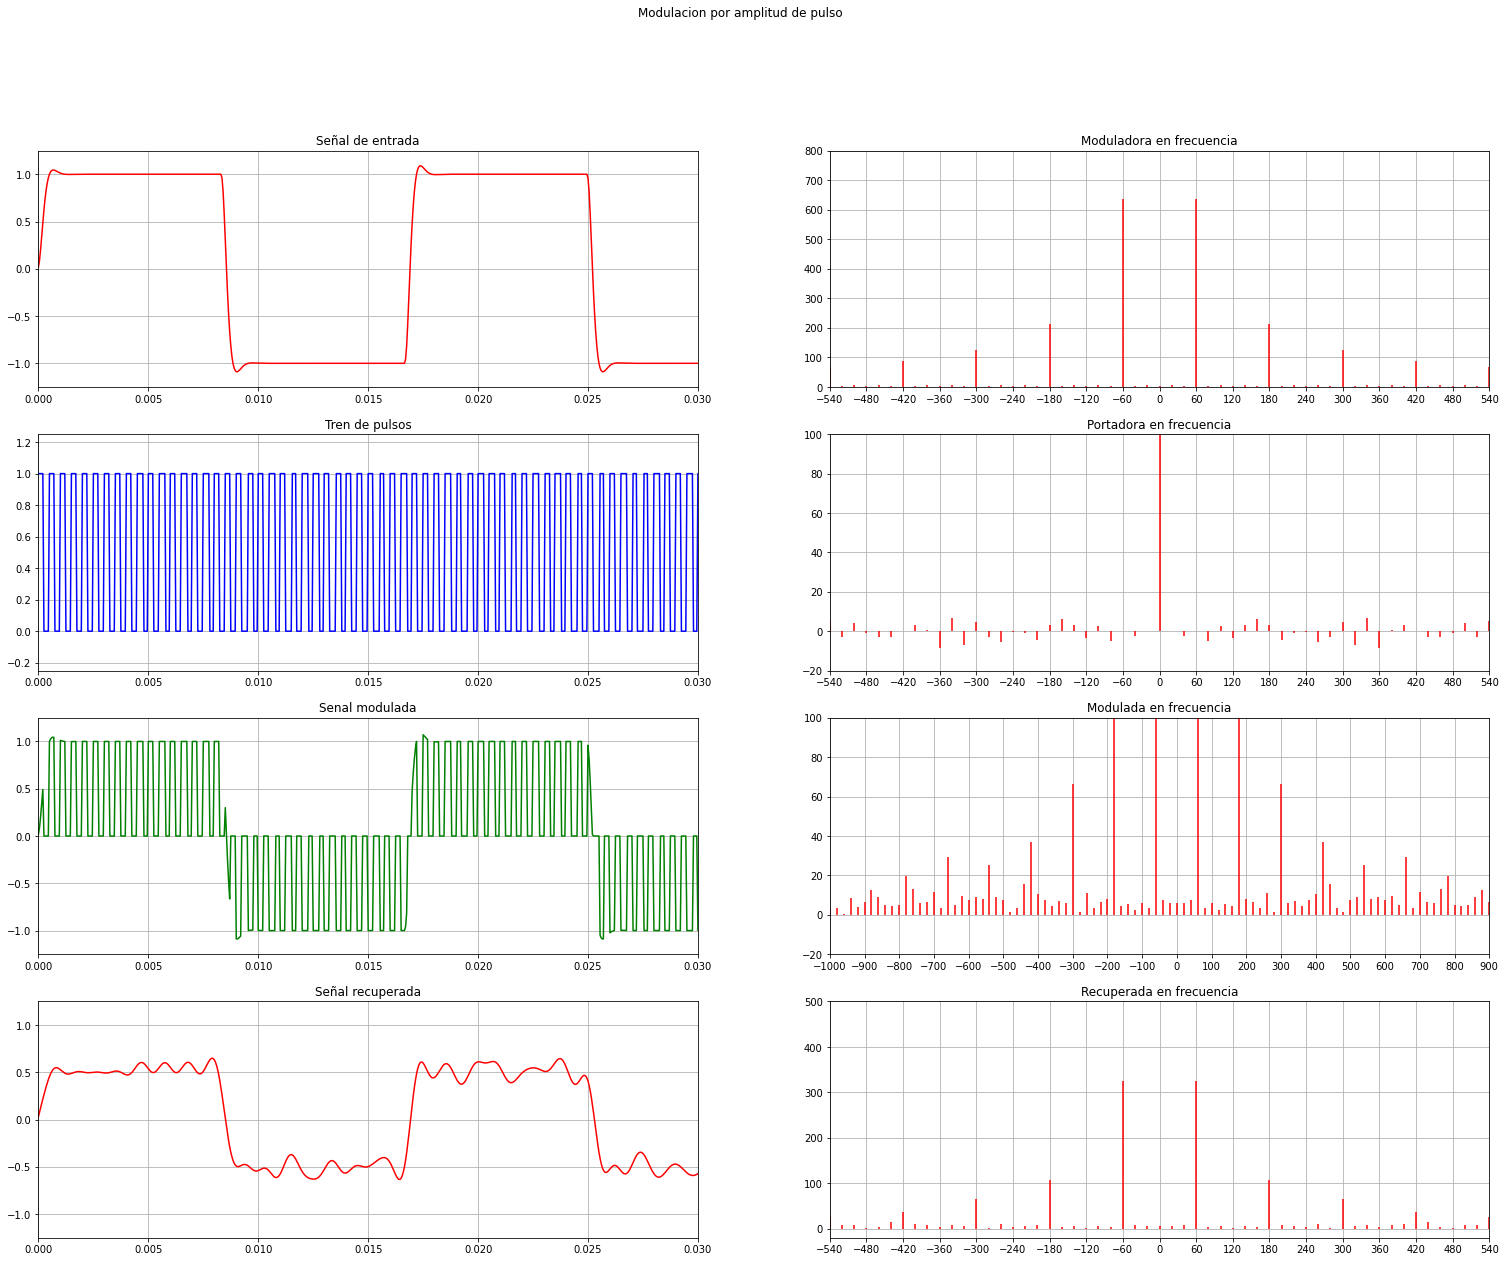

In [14]:
#Cuadrada, muestreo apropiado y pulso normal
PAM()

Seguido se prueba con una señal cuadrada, la cual primero debe de pasarse por un filtro para obtener una señal de banda limita y poder muestrear correctamente. La modulacion se realiza con muestreo apropiado y un pulso ancho. Para la condicion de muestreo apropiado y pulso normal se obtienen los resultados deseados, es decir la modulacion obtenida es la esperada y se logra recuperar la señal moduladora. Debido a la naturaleza del filtro aplicado para la recuperacion se presenta distorcion en la señal recuperada, sin embargo la forma de la señal obtenida es la deseada.

Tipos de senales:
1-Senoidal
2-Cuadrada 
3-Triangular
Tiempos de muestreo:
1-Submuestreo
2-Muestreo apropiado 
3-Sobremuestreo
Ancho de pulso:
1-Angosto
2-Normal 
3-Ancho

La onda modulada es Triangular, con Muestreo apropiado y de pulso Normal


C:\Users\carlo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\carlo\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


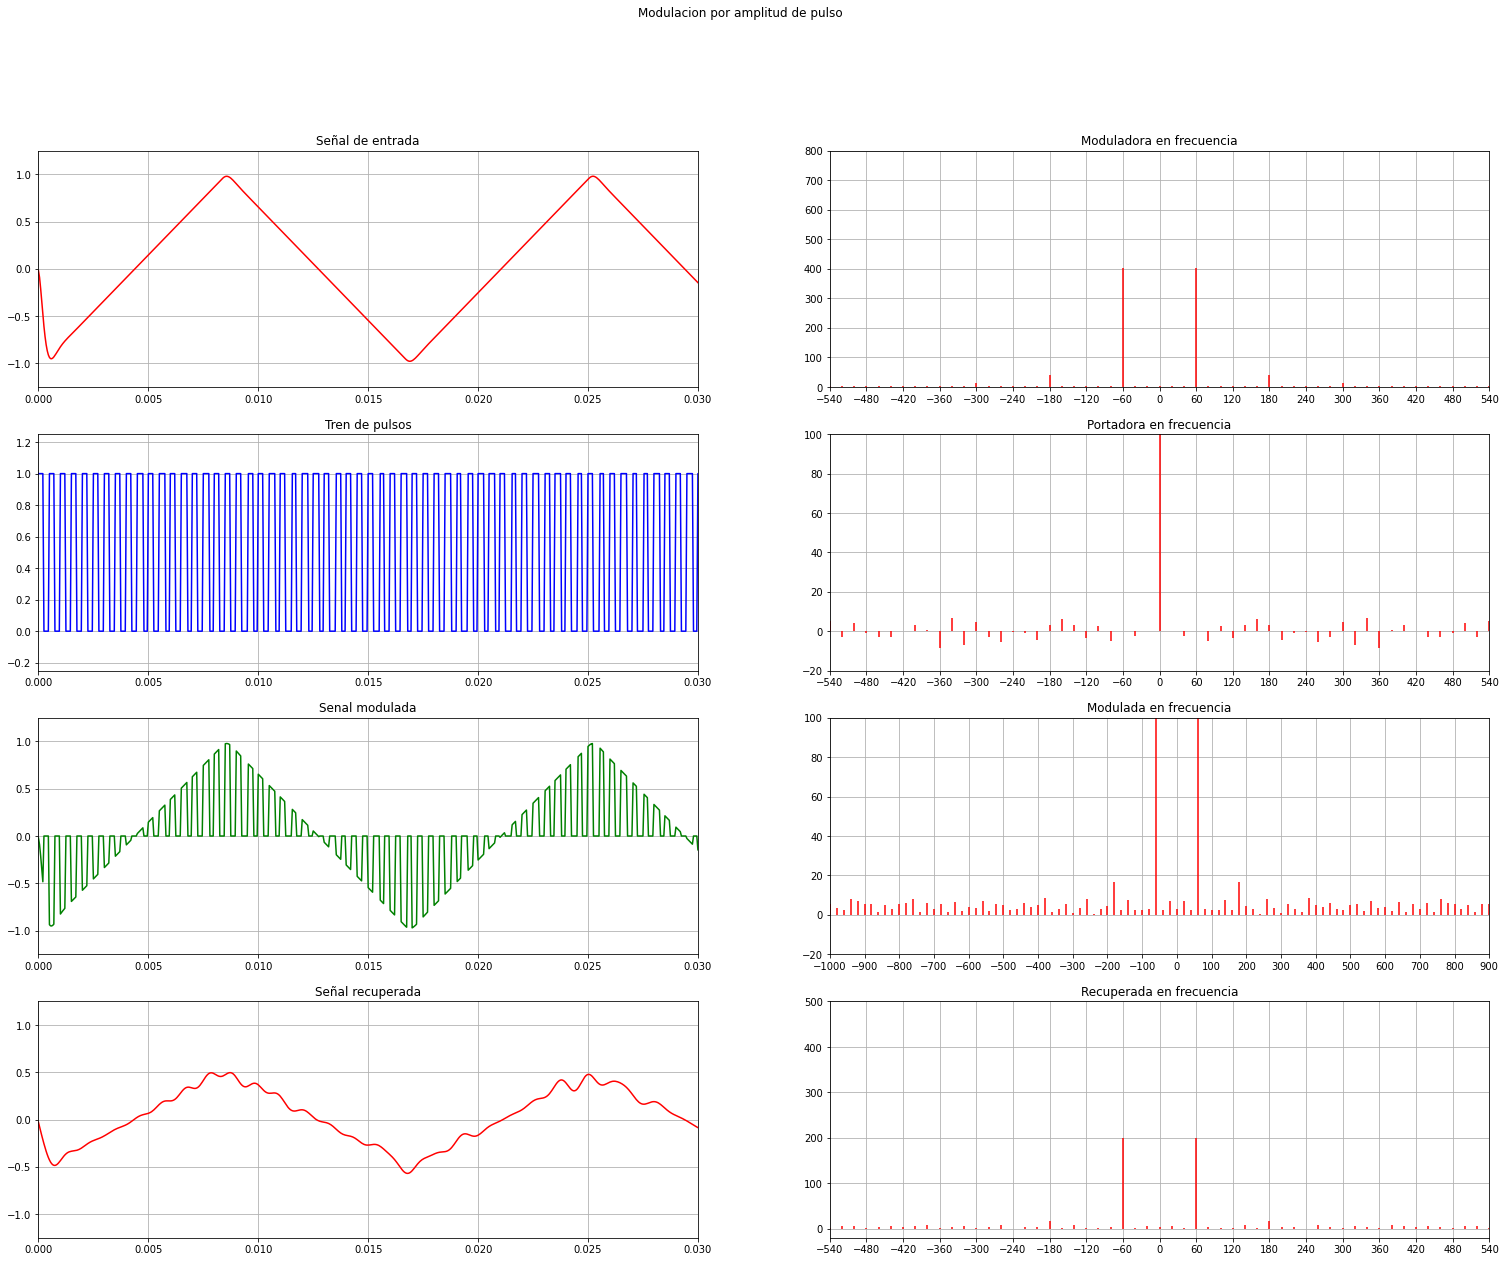

In [10]:
#Triangular, apropiado y normal
PAM()

Nuevamente, se observa una correcta modulacion, en este caso para una señal triangular con un muestreo apropiado y pulso normal, cabe destacar que la señal triangular tambien debe ser transforama a una señal de banda limitada. La señal modulada posee el coportamiento deseado. Y la señal recuperada tiene la forma deseada, viendose afectada por una atenuacion y distorcion de la misma, sin embargo conserva la forma y comportamiento de la señal moduladora.

Para poder obtener mejores comparaciones para el analisis, se procede a cambiar las condiciones de la modulacion por muestreo de ancho de pulso, sin embargo se realizaran todas para una señal moduladora senoidal.

Tipos de senales:
1-Senoidal
2-Cuadrada 
3-Triangular
Tiempos de muestreo:
1-Submuestreo
2-Muestreo apropiado 
3-Sobremuestreo
Ancho de pulso:
1-Angosto
2-Normal 
3-Ancho

La onda modulada es Senoidal, con Submuestreo y de pulso Normal


C:\Users\carlo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\carlo\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


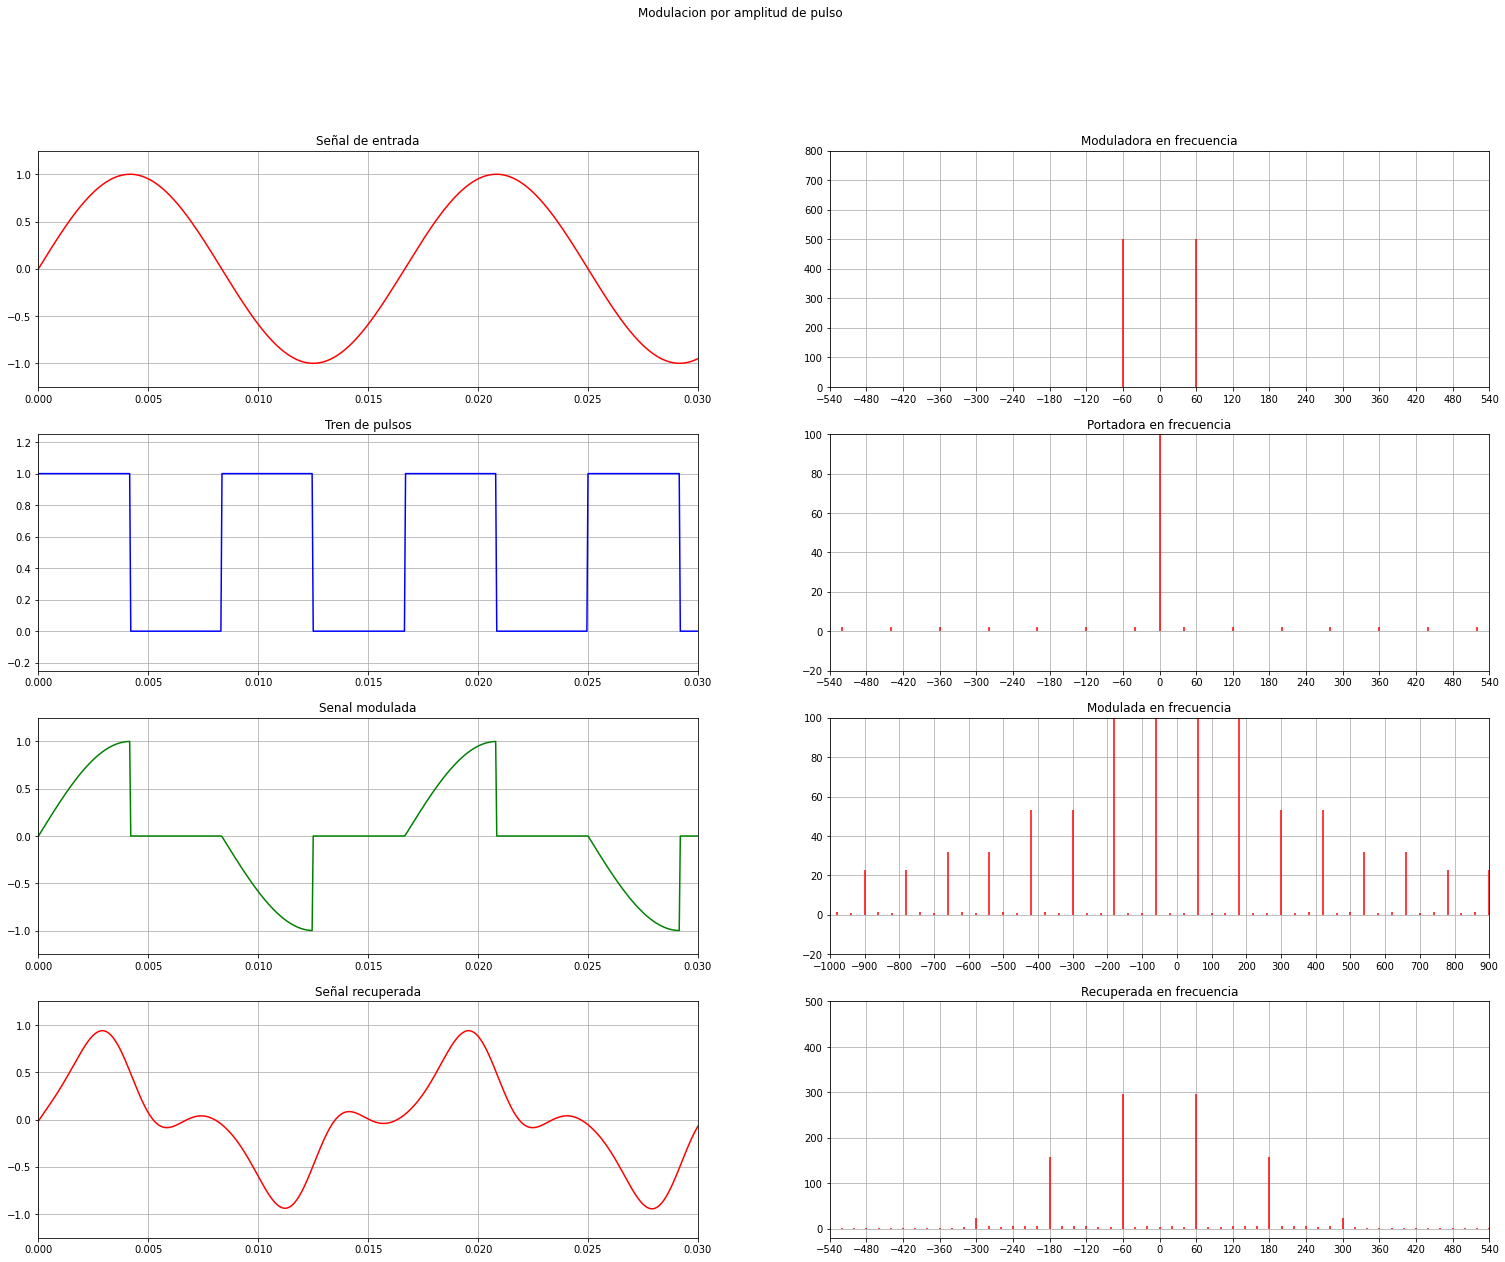

In [15]:
#Senoidal, submuestreo y normal
PAM()

Se muestran los resultados para una señal moduladora senoidal, con submuestreo y pulso normal, para poder apreciar mejor las consecuencias del submuestreo. En este caso, se observa como la señal muestreada no contiene parte de la señal moduladora, para las condiciones especificas que se presentan, se muestra unicamente la parte inicial de cada cresta/valle de la señal moduladora, eliminando completamente la otra mitad, es decir se pierde gran parte del mensaje. Esto se aprecia mas claramente en la señal recuperada, la cual es muy diferente de la señal moduladora, lo que indica que no se puede recuperar el mensaje y demuestra que el submuestreo es algo critico para la modulacion por muestreo de ancho de pulso.

Tipos de senales:
1-Senoidal
2-Cuadrada 
3-Triangular
Tiempos de muestreo:
1-Submuestreo
2-Muestreo apropiado 
3-Sobremuestreo
Ancho de pulso:
1-Angosto
2-Normal 
3-Ancho

La onda modulada es Senoidal, con Sobremuestreo y de pulso Normal


C:\Users\carlo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\carlo\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


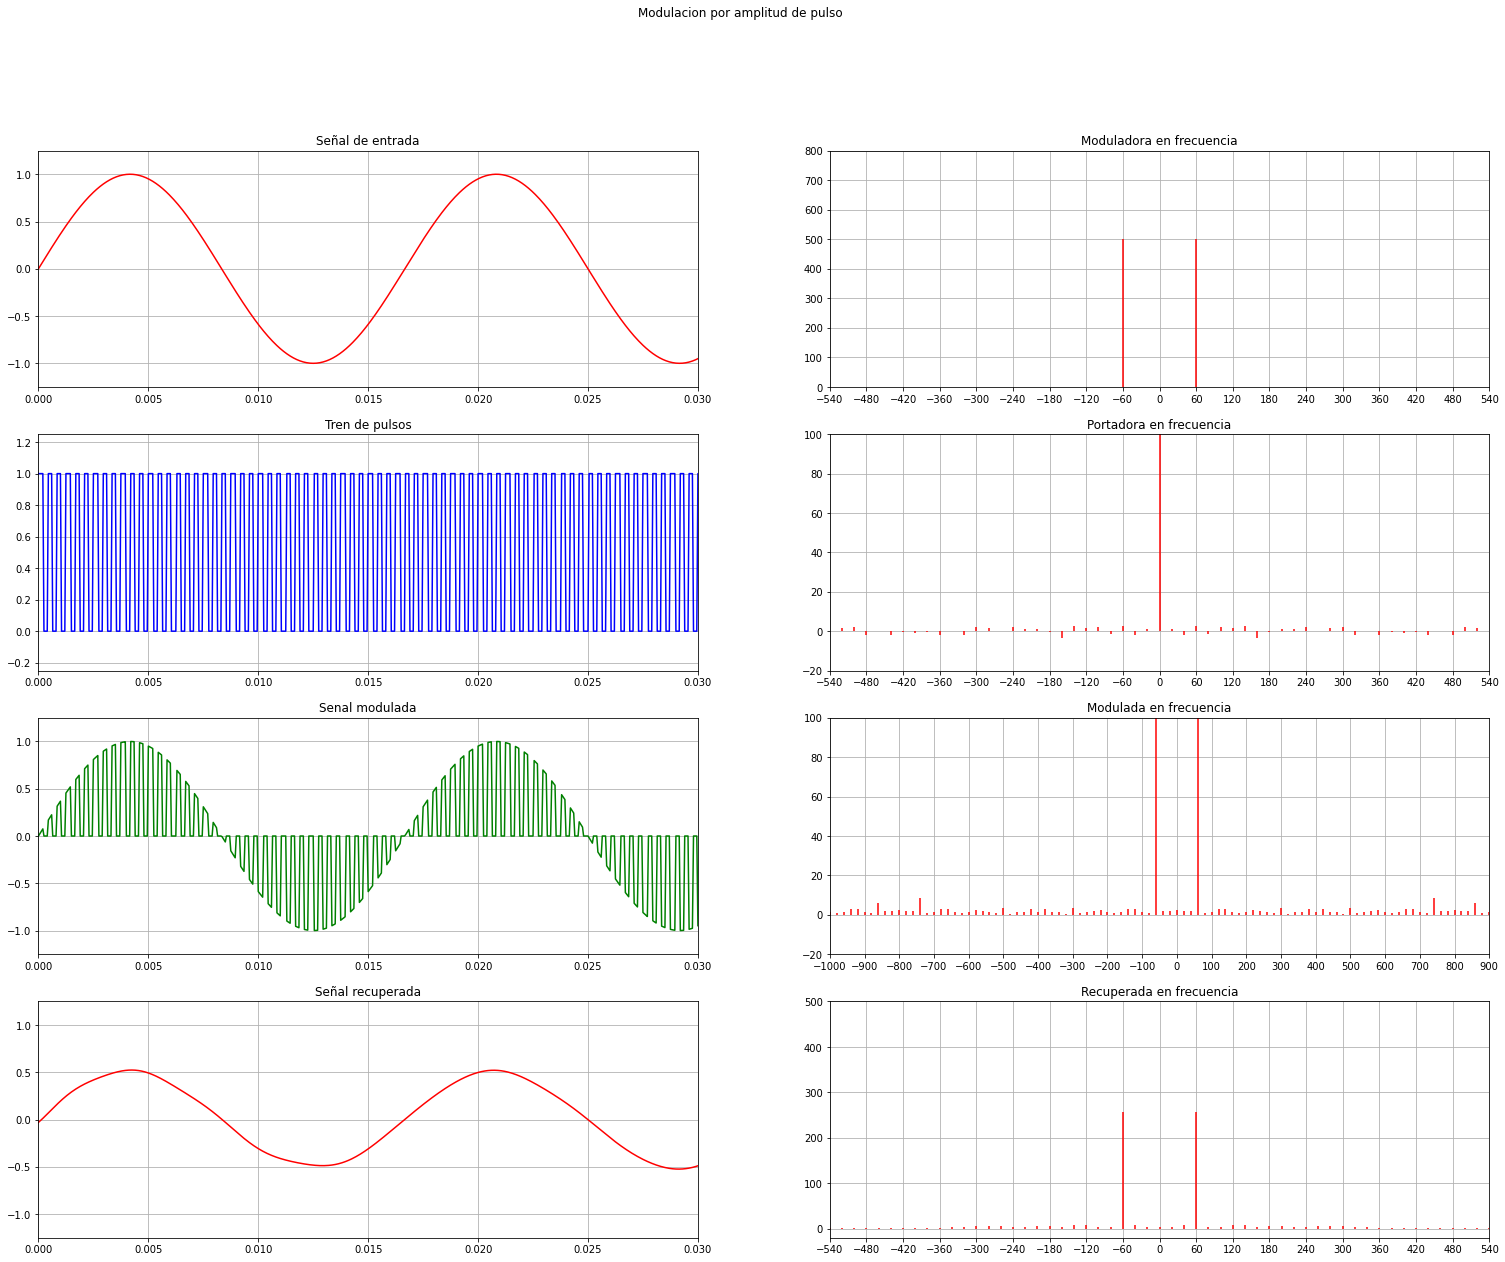

In [16]:
#Senoidal, sobremuestreo y normal
PAM()

Por otro lado, en estas graficas se aprecian los efectos del sobremuestreo en una señal moduladora senoidal y con pulso normal. Se observa como la señal modulada tiene el comportamiento deseado. La señal recuperada es la esperada y se logra recuperar el mensaje enviado, el comportamiento de la señal recuperada es igual a la señal moduladora, con algunos cambios debido a la naturaleza del filtro para la recuperacion, es decir, la condicion de sobremuestreo permite la recuperacion del mensaje muestreado y no presenta problemas, sin embargo, tampoco representa ningun beneficio sobre los resultados obtenidos con muestreo apropiado, a pesar de que requiere un mayor consumo de recursos que un muestreo apropiado.

Tipos de senales:
1-Senoidal
2-Cuadrada 
3-Triangular
Tiempos de muestreo:
1-Submuestreo
2-Muestreo apropiado 
3-Sobremuestreo
Ancho de pulso:
1-Angosto
2-Normal 
3-Ancho

La onda modulada es Senoidal, con Muestreo apropiado y de pulso Angosto


C:\Users\carlo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\carlo\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


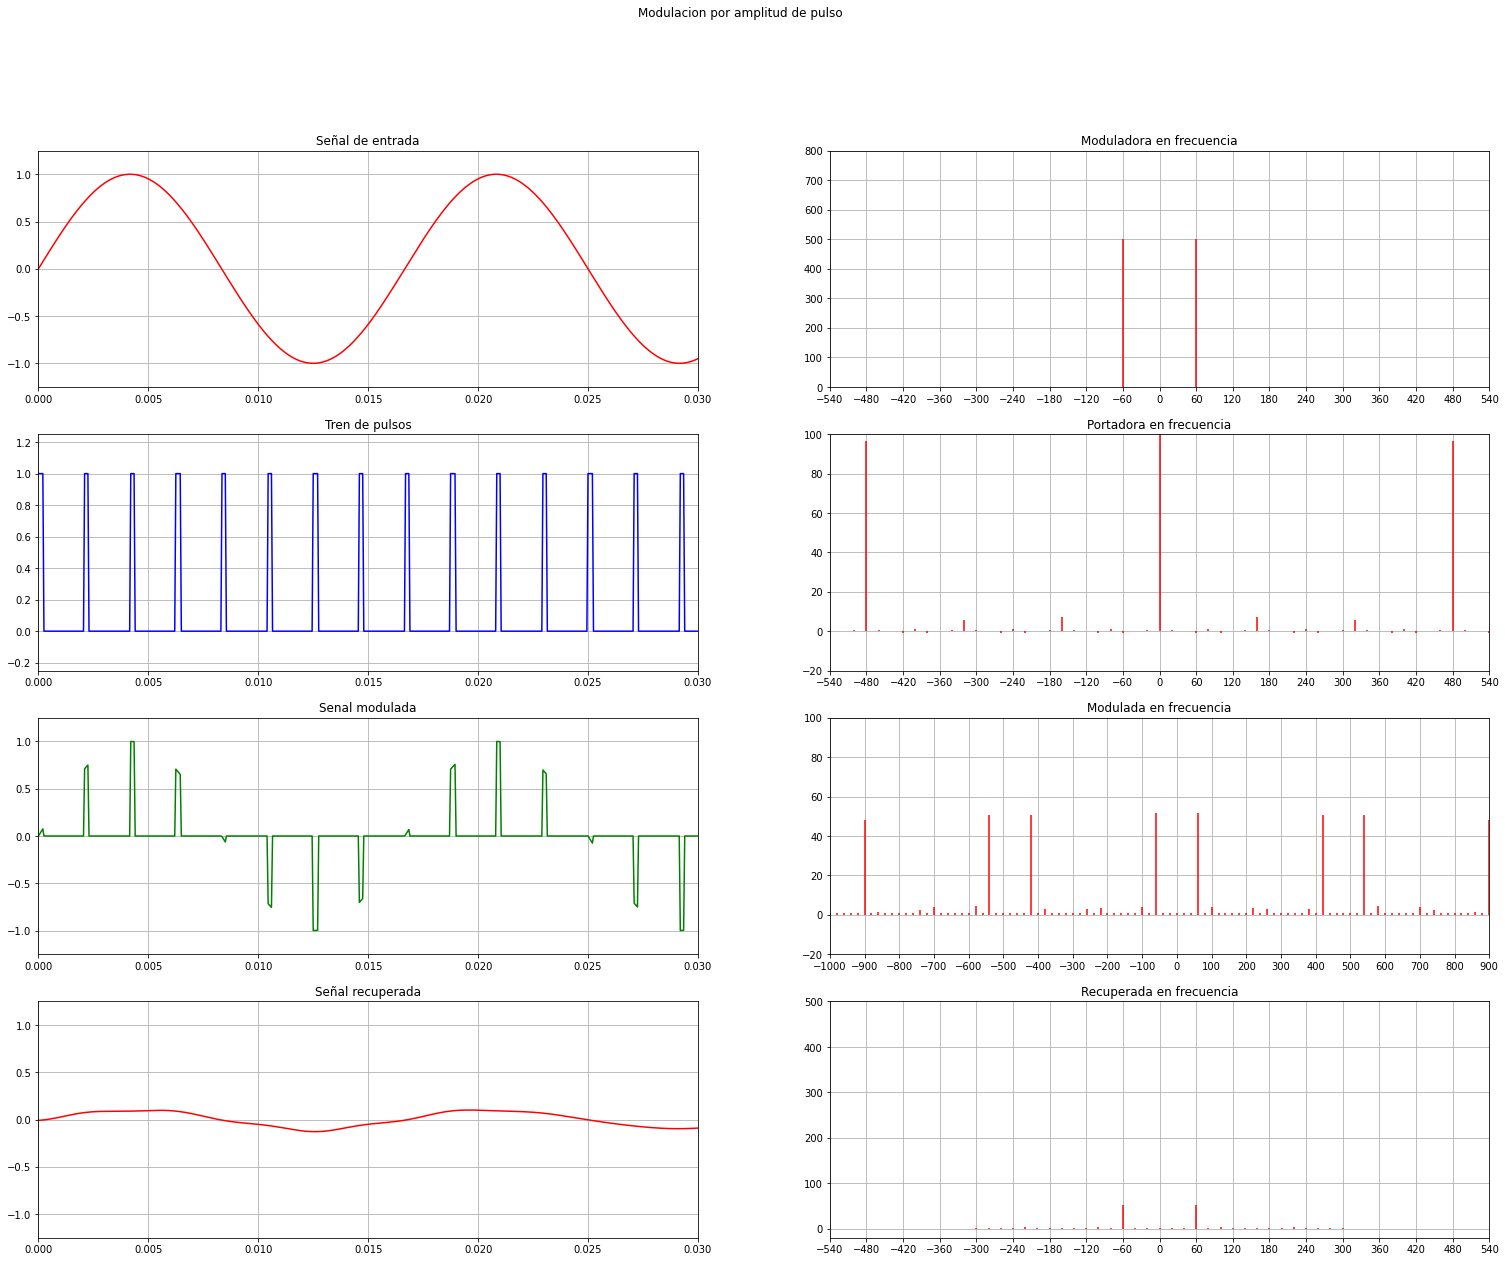

In [17]:
#Senoidal, muestreo apropiado y pulso angosto
PAM()

Las graficas anteriores muestran los efectos de un pulso angosto en la modulacion por muestreo PAM. La señal moduladora es una senoidal y un muestreo apropiado. Se observa que la señal moduladora tiene la forma esperada, sin embargo, omite gran parte de la señal moduladora. Debido a esto, la señal recuperada tiene cierta semejanza con una senoidal pero de muy baja amplitud, es decir que ademas de la atenuacion producto del filtro, se aprecia una atenaucion significativa producto del pulso angosto. A pesar de esto, en el dominio de la frecuencia se observa que la señal recuperada es la señal moduladora con una gran atenuacion, lo cual se puede resolver mediante amplificacion.

Tipos de senales:
1-Senoidal
2-Cuadrada 
3-Triangular
Tiempos de muestreo:
1-Submuestreo
2-Muestreo apropiado 
3-Sobremuestreo
Ancho de pulso:
1-Angosto
2-Normal 
3-Ancho

La onda modulada es Senoidal, con Muestreo apropiado y de pulso Ancho


C:\Users\carlo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\carlo\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


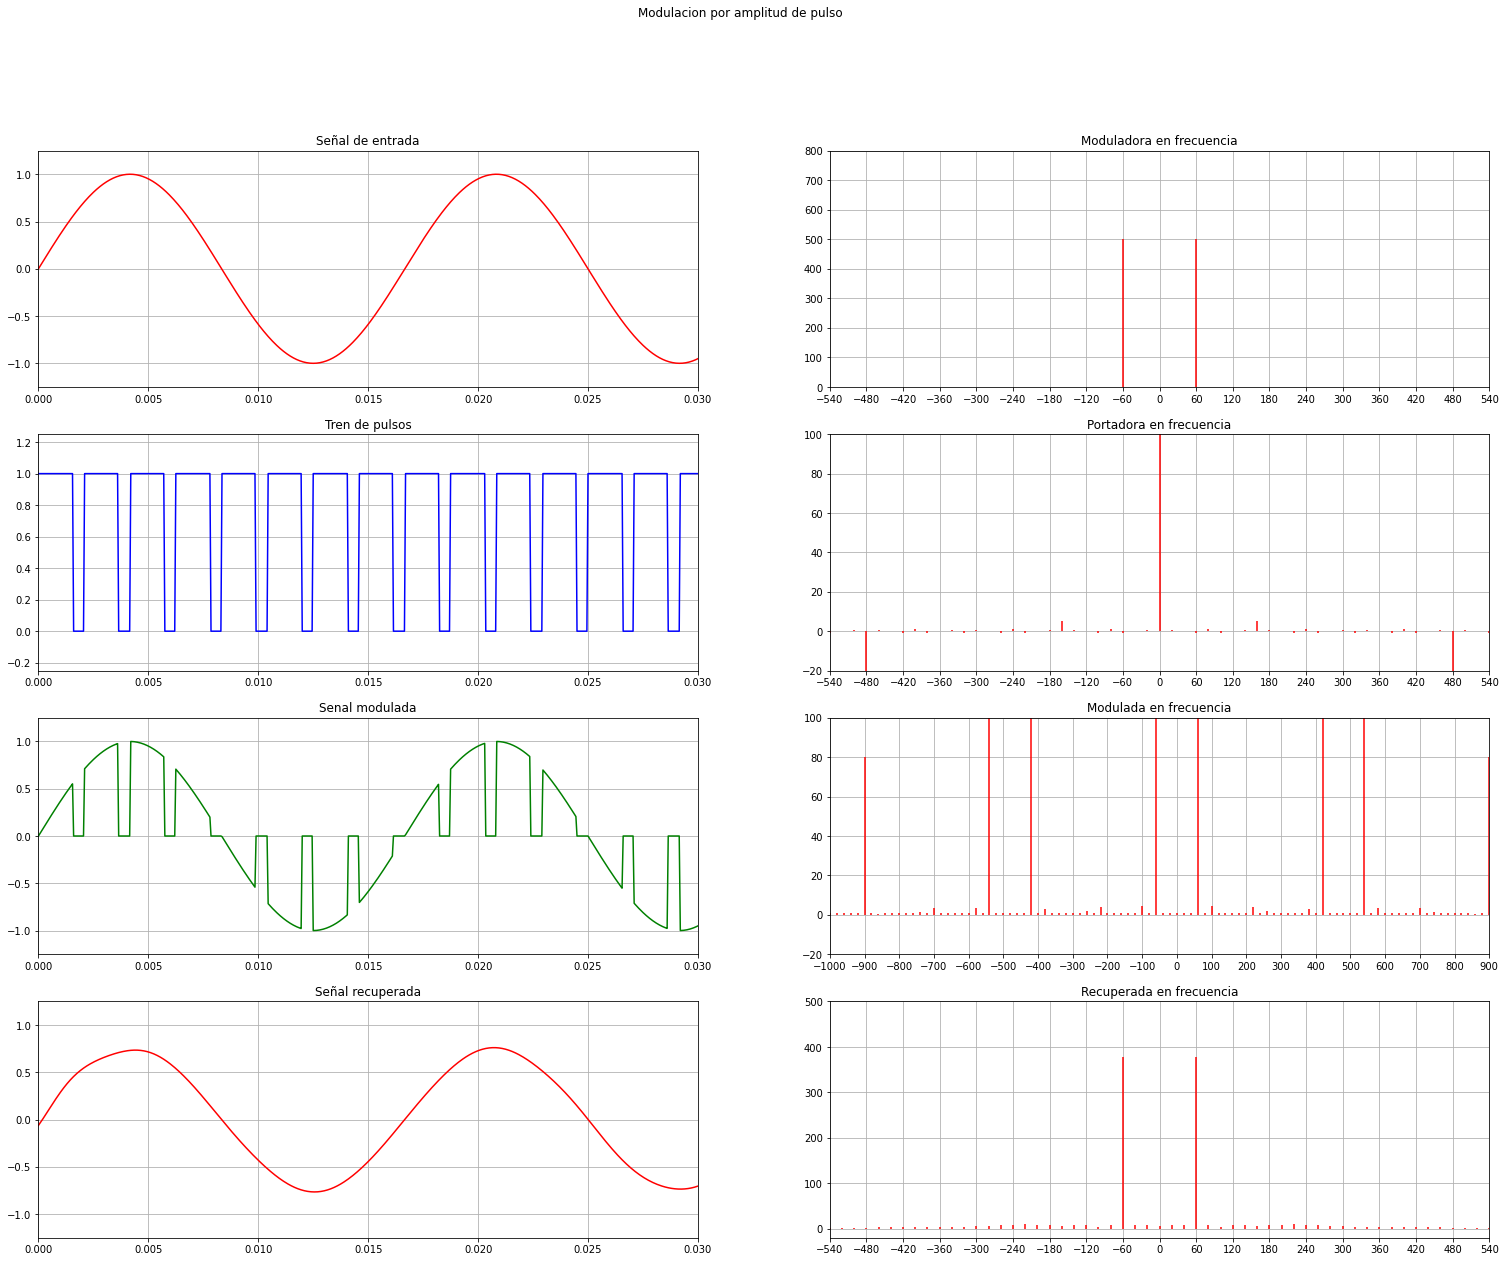

In [18]:
#Senoidal, muestreo apropiado y pulso ancho
PAM()

Los efectos de un pulso ancho en la modulacion por muestreo de ancho de pulso se observan en las graficas anteriores. Se aprecia la modulacion para una señal moduladora senoidal y un muestreo apropiado. Las señales obtenidas son las deseadas, la señal muestreada tiene el comportamiento deseado y contiene la informacion necesaria de la señal moduladora. Por otro lado, la señañ recuperada es la señal moduladora, con una ligera atenuacion debido a la naturaleza del filtro. El pulso ancho no representa ningun problema para la modulacion PAM, sin embargo tampoco presenta alguna ventaja significativa sobre un pulso normal, a pesar de que consume mas recursos que la modulacion utilizando un pulso normal.

Tipos de senales:
1-Senoidal
2-Cuadrada 
3-Triangular
Tiempos de muestreo:
1-Submuestreo
2-Muestreo apropiado 
3-Sobremuestreo
Ancho de pulso:
1-Angosto
2-Normal 
3-Ancho

La onda modulada es Senoidal, con Submuestreo y de pulso Ancho


C:\Users\carlo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\carlo\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


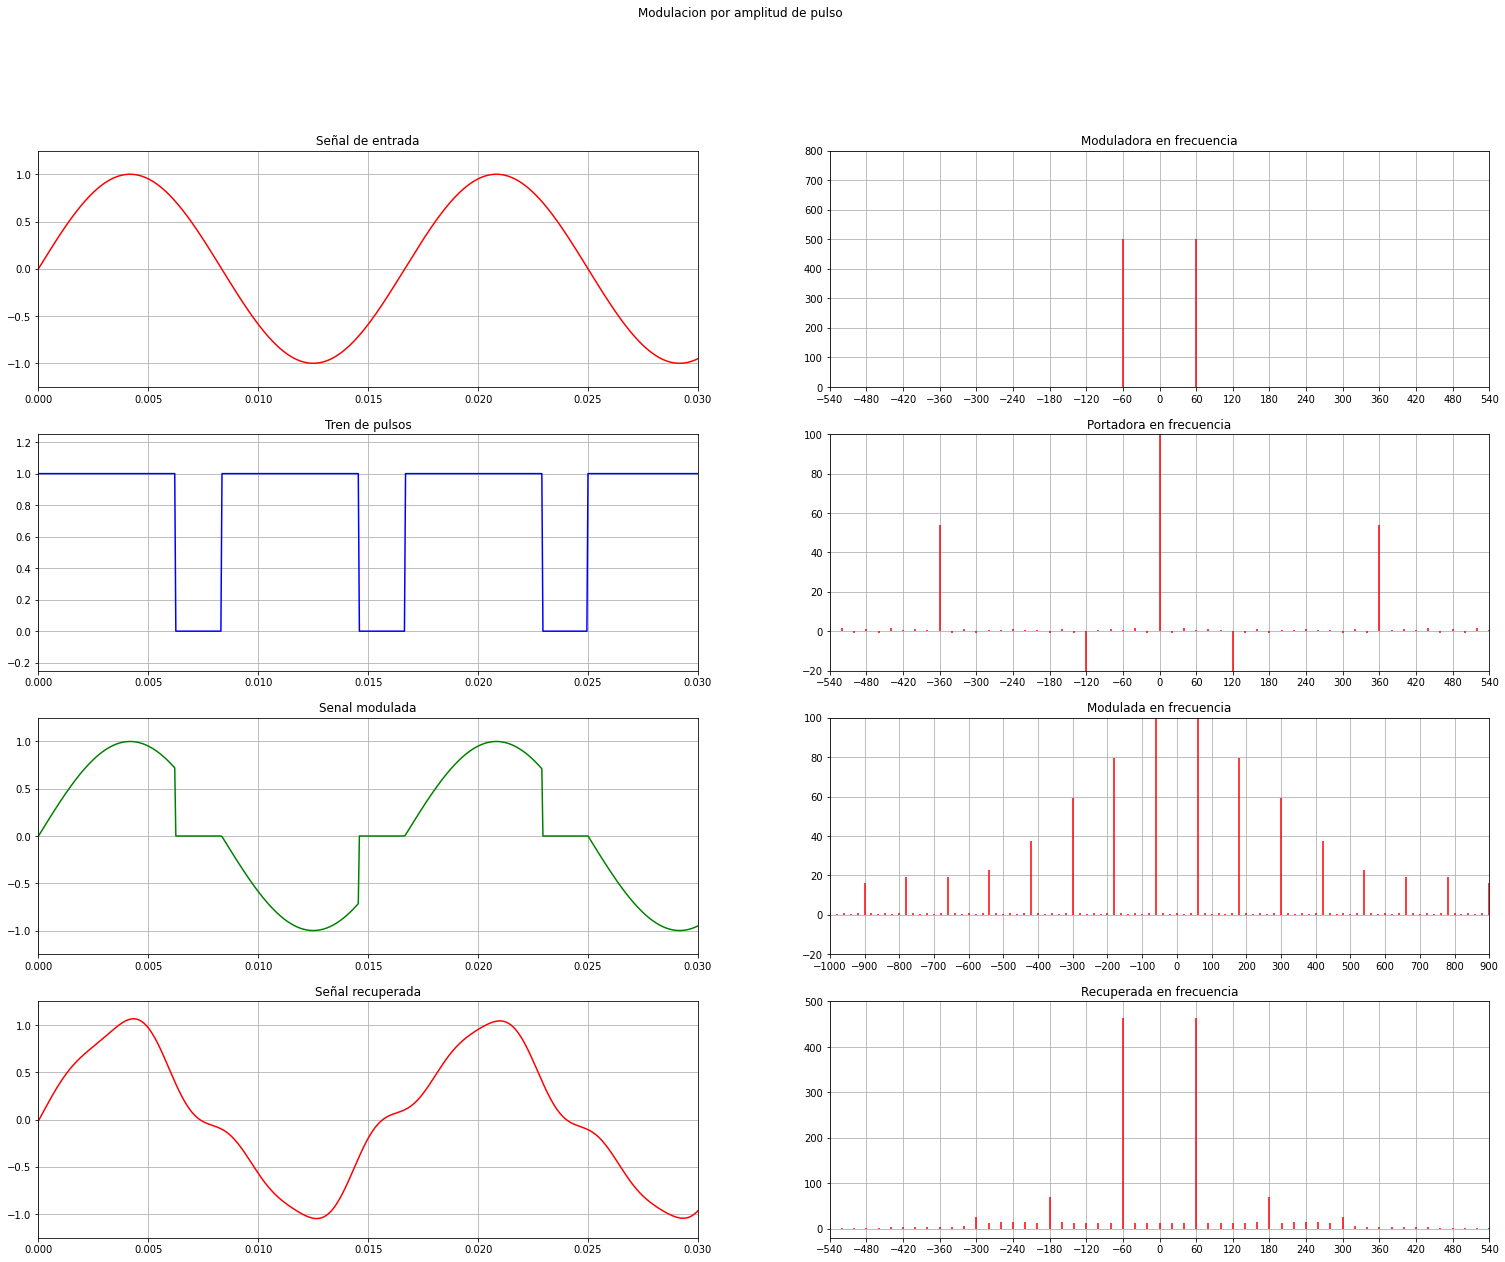

In [20]:
#Senoidal, submuestreo y pulso ancho
PAM()

Al combinar los efectos de submodulacion y pulso ancho utilizando una señal moduladora senoidal se obtienen las graficas anteriores, donde se conserva el problema del submuestreo y es que omite una parte significativa de la señal moduladora. La señal recuperada no es la señal deseada puesto que se diferencia significativamente de la señal moduladora.

Dependiendo de las condiciones de la modulacion por muestreo de ancho de pulso se obtienen diferentes resultados, tanto buenos, como malos. Se concluye que el submuestreo presenta efectos criticos sobre la señal modulada y no permite la correcta recuperacion del mensaje resultando en una señal recuperada distinta de la deseada. El principal efecto producto del uso de un pulso angosto es una atenuacion significativa de la señal moduladora, al recuperar la señal modulada, es decir que la señal que se recupera es la señal moduladora significativamente atenuada, sin embargo esto es facilmente corregible mediante la amplificacion. Efectos como el sobremuestreo y el uso de un pulso ancho no producen beneficios significativos sobre el muestreo apropiado y el uso de un pulso normal, a pesar de que los primeros requieren del consumo de mas recursos. Finalmente, las mejores condiciones para la modulacion por muestreo de ancho de pulso, tanto por eficiencia como por resultados obtenidos, seria un muestreo apropiado y el uso de pulso normal para el muestreo.

## ACTIVIDAD # 2

### 1. Para una señal de entrada:

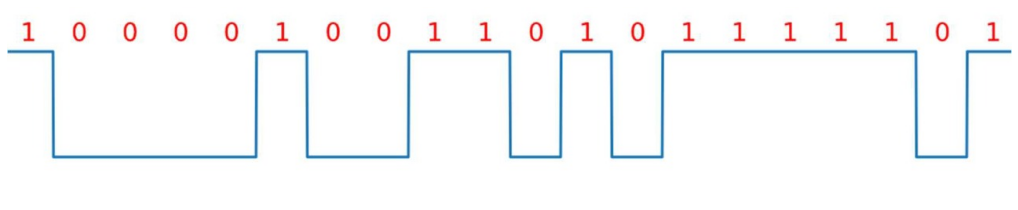

In [ ]:
#Señal de entrada
file_path = os.path.join(path , 'Señal_de_entrada.jpeg')
img_org = io.imread(file_path)
plt.figure(figsize = (18,24))
plt.imshow(img_org)
plt.axis('off')
plt.show()

#### Represente los esquemas de ASK, FSK, y PSK, para la señal de entrada indicada, debe colocar las curvas de manera tal que se puedan visualizar en una misma figura, para un total de 5 graficas, la señal de entrada, la señal moduladora (senoidal) y las 3 señales ASK, FSK y PSK.

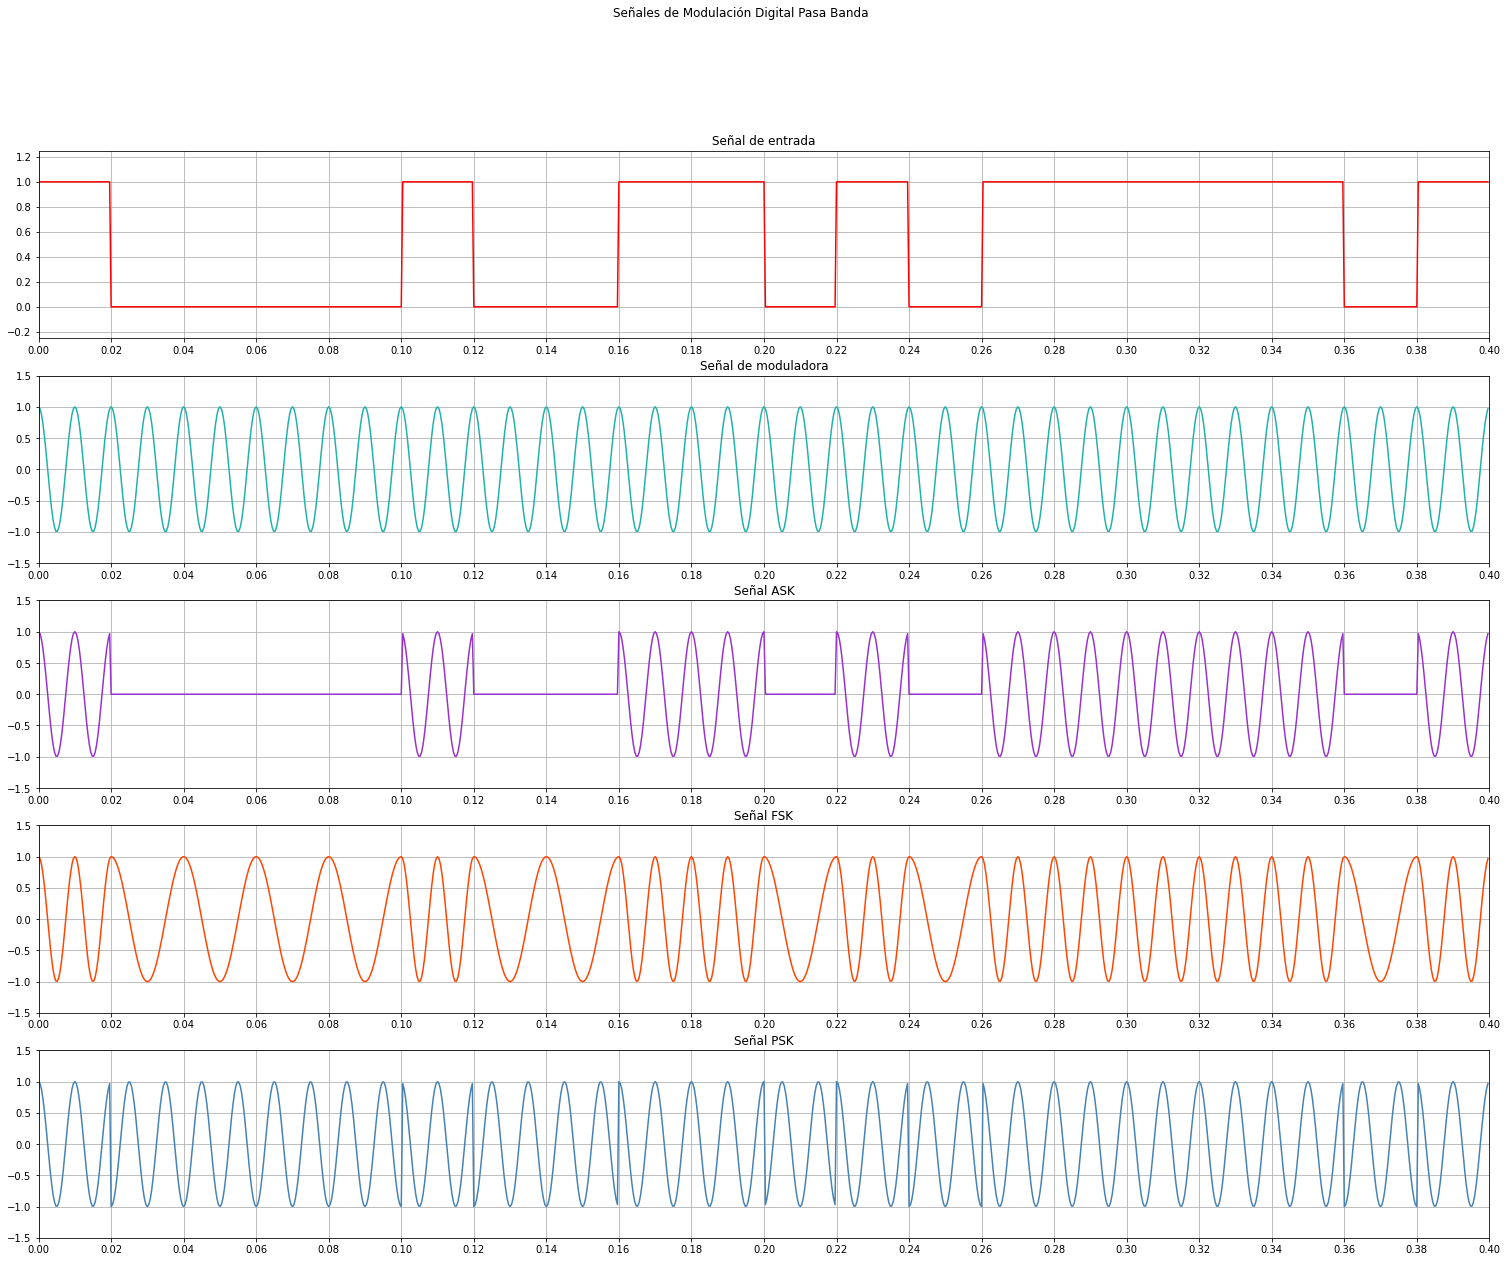

In [ ]:
#Duracion y numero de puntos
T = 0.4
samples = 1000

#Espacio temporal
t = linspace(0, T, samples, endpoint=False)

#Señal de entrada
code = [1,0,0,0,0,1,0,0,1,1,0,1,0,1,1,1,1,1,0,1]
periodos = len(code)
IN1 = t*periodos//T
IN_SIGNAL =[]
for i in range(samples):
    IN_SIGNAL.append(code[int(IN1[i])])

#Señal moduladora
fm = 100
Am = 1
m = cosenoidal(fm,Am)

#Señal ASK
ASK = m*IN_SIGNAL

#Señal FSK
m2 = cosenoidal(fm/2,Am)
IN_SIGNAL_MOD2 = []
for i in range(samples):
    IN_SIGNAL_MOD2.append(-1*(IN_SIGNAL[i]-1))
FSK = m*IN_SIGNAL + m2*IN_SIGNAL_MOD2

#Señal PSK
IN_SIGNAL_MOD1 = []
for i in range(samples):
    IN_SIGNAL_MOD1.append(2*(IN_SIGNAL[i]-0.5))
PSK = IN_SIGNAL_MOD1*m

#Plot de las señales
fig3, axs = plt.subplots(5,1,figsize=(26,20))
fig3.suptitle('Señales de Modulación Digital Pasa Banda')

#Moduladora y su derivada
axs[0].plot(t,IN_SIGNAL,color='red')
axs[0].set_title('Señal de entrada')
axs[0].set(xlim=(0,0.4),ylim=(-0.25,1.25))
axs[0].xaxis.set_major_locator(MultipleLocator(0.02))
axs[0].grid()

axs[1].plot(t,m,color='lightseagreen')
axs[1].set_title('Señal de moduladora')
axs[1].set(xlim=(0,0.4),ylim=(-1.5,1.5))
axs[1].xaxis.set_major_locator(MultipleLocator(0.02))
axs[1].grid()

axs[2].plot(t,ASK,color='darkorchid')
axs[2].set_title('Señal ASK')
axs[2].set(xlim=(0,0.4),ylim=(-1.5,1.5))
axs[2].xaxis.set_major_locator(MultipleLocator(0.02))
axs[2].grid()

axs[3].plot(t,FSK,color='orangered')
axs[3].set_title('Señal FSK')
axs[3].set(xlim=(0,0.4),ylim=(-1.5,1.5))
axs[3].xaxis.set_major_locator(MultipleLocator(0.02))
axs[3].grid()

axs[4].plot(t,PSK,color='steelblue')
axs[4].set_title('Señal PSK')
axs[4].set(xlim=(0,0.4),ylim=(-1.5,1.5))
axs[4].xaxis.set_major_locator(MultipleLocator(0.02))
axs[4].grid()

plt.show()